## Financial Transaction Analysis

Python Visualization

1. Transaction Volume Over Time:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

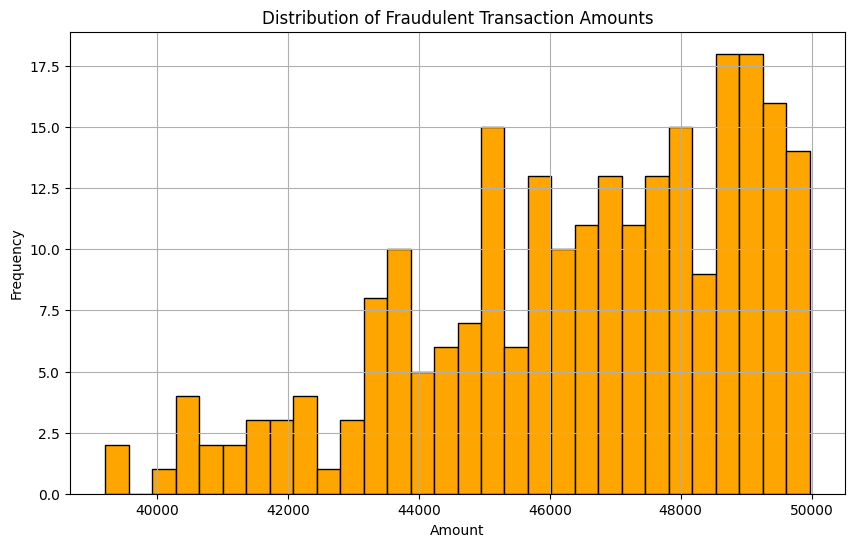

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
from mysql.connector import Error

# Establish a single connection and cursor
try:
    connection = mysql.connector.connect(
        host="localhost",
        port=3306,
        user="root",
        password="1234",
        database="fintech_pro"
    )
    cursor = connection.cursor()

    def fetch_data(query):
        try:
            cursor.execute(query)
            data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
            return data
        except Error as err:
            print(f"Error: {err}")
            return None

    # Example queries
    query_fraud_amounts = """
    SELECT t.amount 
    FROM transactions t 
    JOIN fraud_analysis f ON t.transaction_id = f.transaction_id
    """
    df_fraud_amounts = fetch_data(query_fraud_amounts)
    if df_fraud_amounts is not None:
        # Plot distribution of fraudulent transaction amounts
        plt.figure(figsize=(10, 6))
        plt.hist(df_fraud_amounts['amount'], bins=30, color='orange', edgecolor='black')
        plt.title('Distribution of Fraudulent Transaction Amounts')
        plt.xlabel('Amount')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    # Add more queries and visualizations here

except Error as err:
    print(f"Error: {err}")

finally:
    # Close cursor and connection
    if cursor:
        cursor.close()
    if connection:
        connection.close()


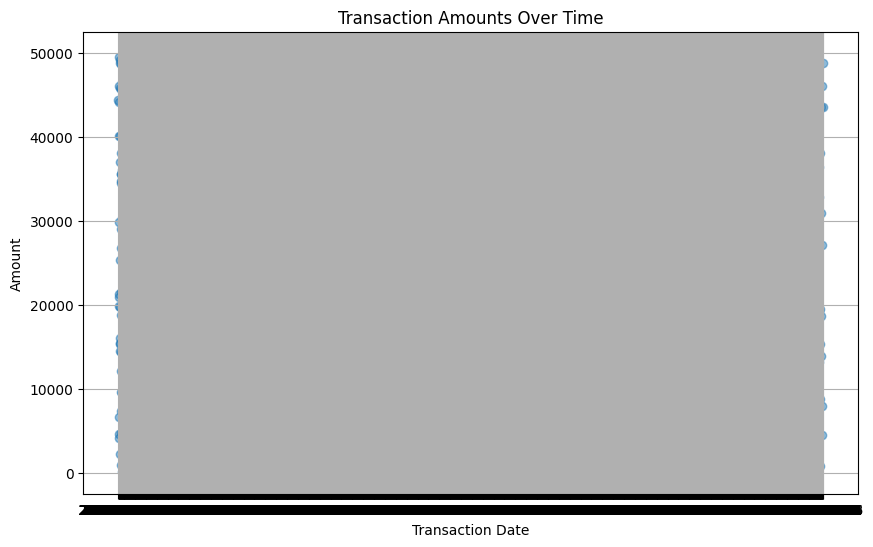

In [29]:
df=pd.read_csv('transactions.csv')
plt.figure(figsize=(10, 6))
plt.scatter(df['transaction_date'], df['amount'], alpha=0.5)
plt.title('Transaction Amounts Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Amount')
plt.grid(True)
plt.show()


In [14]:
import seaborn as sns

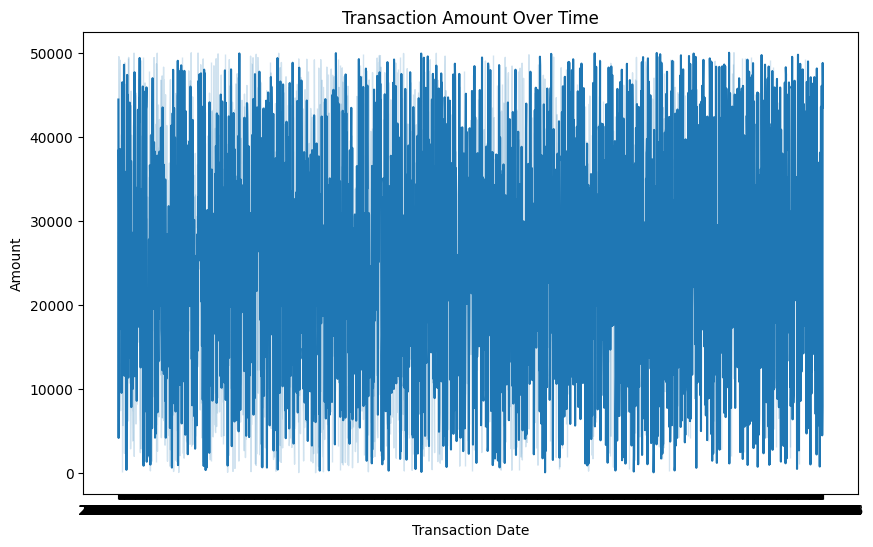

In [30]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='transaction_date', y='amount', data=df)
plt.title('Transaction Amount Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Amount')
plt.show()


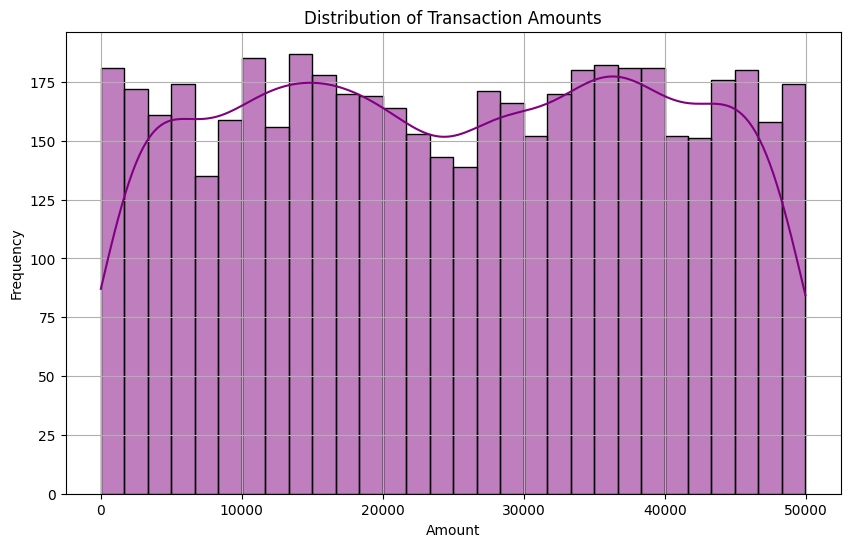

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=30, kde=True, color='purple')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


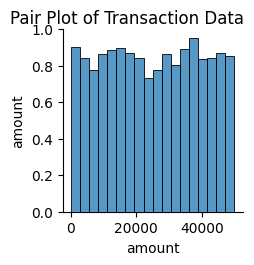

In [17]:
sns.pairplot(df[['amount', 'transaction_date']])  # Add more relevant columns as needed
plt.suptitle('Pair Plot of Transaction Data', y=1.02)
plt.show()


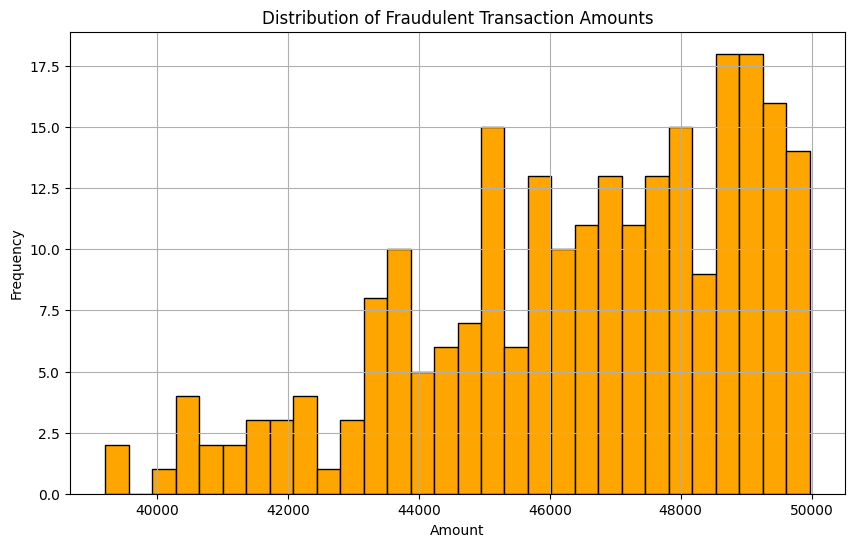

In [21]:
import pandas as pd

# Load data from CSV files
df_transactions = pd.read_csv('transactions.csv')
df_fraud_analysis = pd.read_csv('fraud_analysis.csv')

# Example analysis
# Merge dataframes
df_fraud_transactions = df_transactions.merge(df_fraud_analysis, on='transaction_id')

# Visualization example
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_fraud_transactions['amount'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


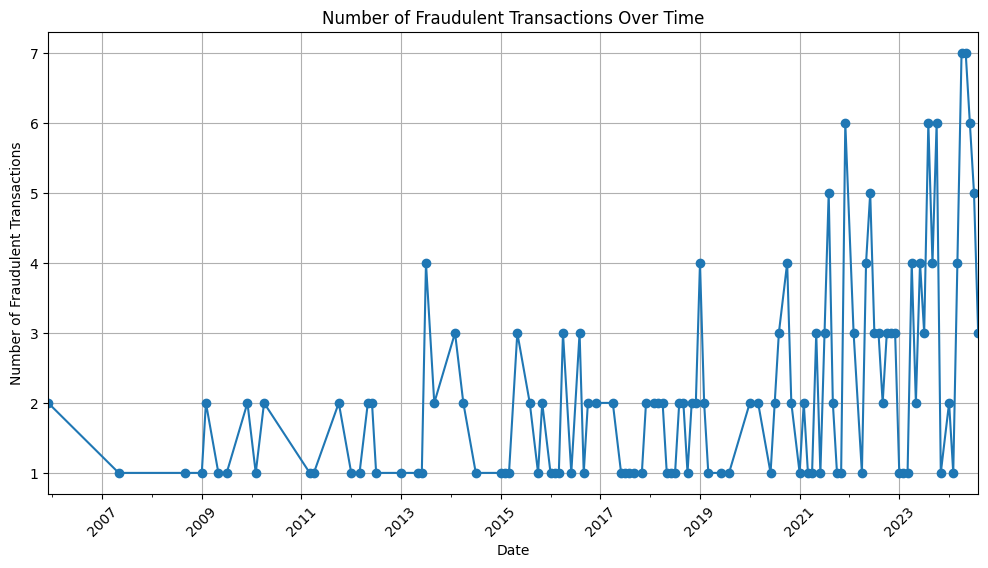

In [22]:
# Assuming df_fraud_transactions is already loaded
df_fraud_transactions['transaction_date'] = pd.to_datetime(df_fraud_transactions['transaction_date'])

# Count fraudulent transactions by date
fraud_by_date = df_fraud_transactions.groupby(df_fraud_transactions['transaction_date'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
fraud_by_date.plot(kind='line', marker='o')
plt.title('Number of Fraudulent Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

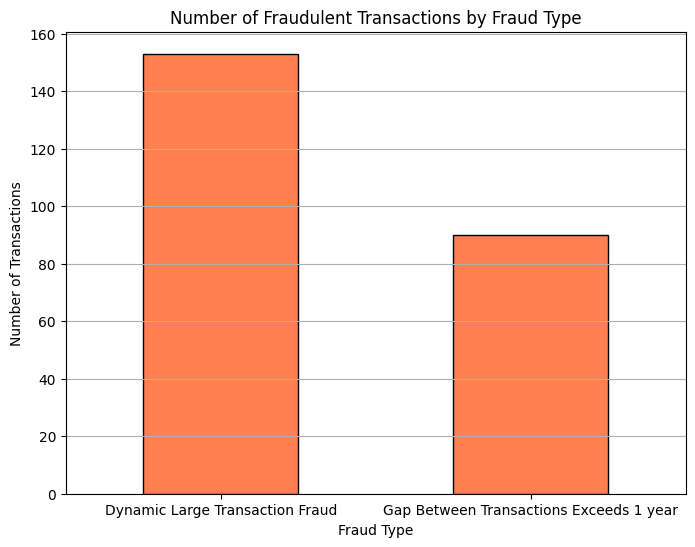

In [24]:
# Count of fraudulent transactions by fraud type
fraud_type_counts = df_fraud_transactions['fraud_type'].value_counts()

plt.figure(figsize=(8, 6))
fraud_type_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Number of Fraudulent Transactions by Fraud Type')
plt.xlabel('Fraud Type')
plt.ylabel('Number of Transactions')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


C:\Users\thera\AppData\Local\Temp\ipykernel_892\2333648200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_fraud_transactions, x='fraud_type', y='amount', palette='pastel')


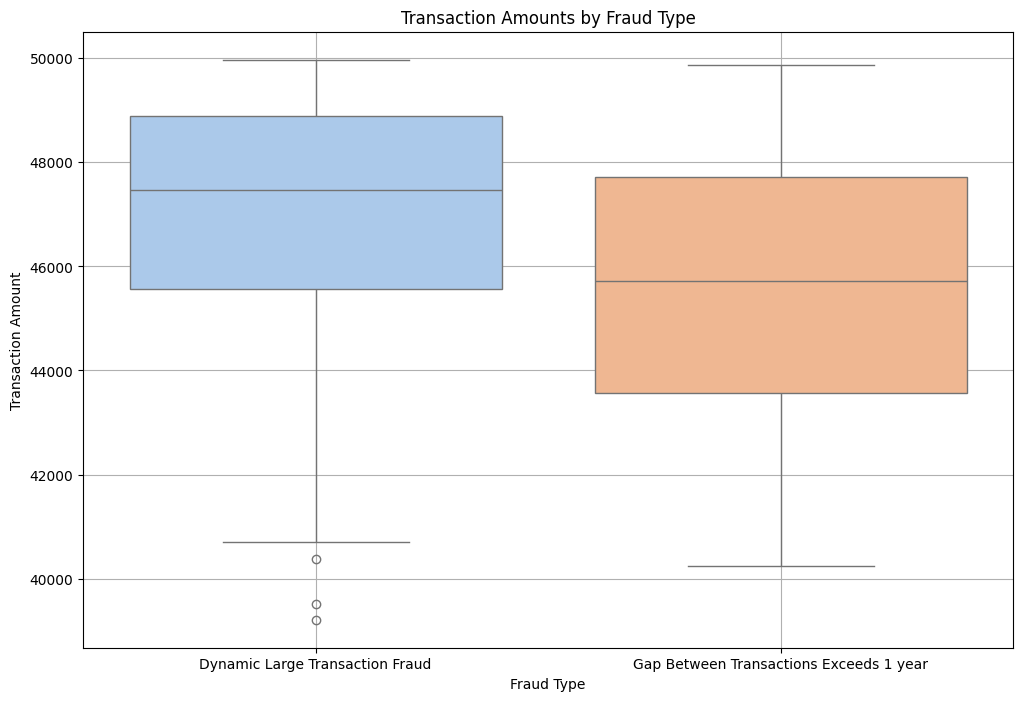

In [26]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_fraud_transactions, x='fraud_type', y='amount', palette='pastel')
plt.title('Transaction Amounts by Fraud Type')
plt.xlabel('Fraud Type')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()


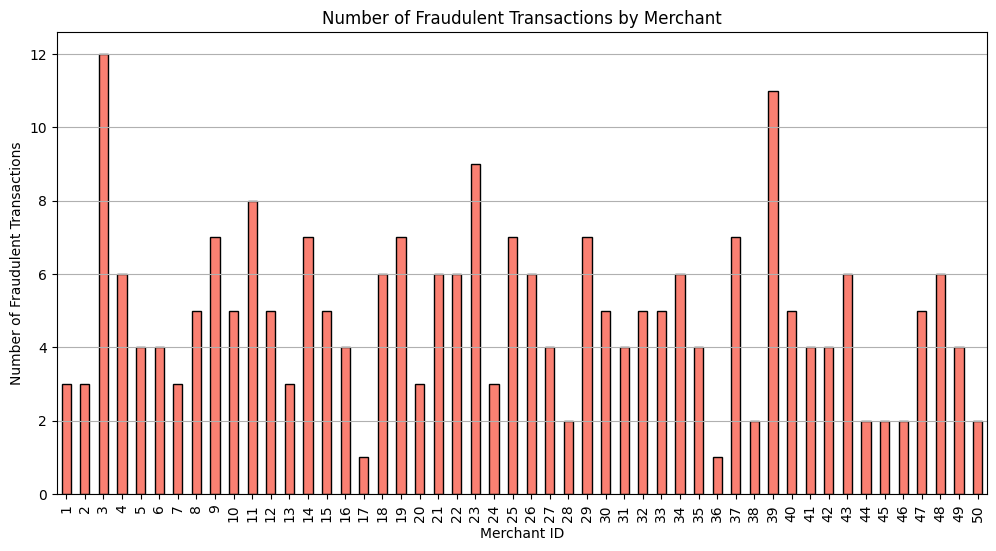

In [28]:
# Assuming merchant_id is present in df_fraud_transactions
fraud_by_merchant = df_fraud_transactions.groupby('merchant_id').size()

plt.figure(figsize=(12, 6))
fraud_by_merchant.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Number of Fraudulent Transactions by Merchant')
plt.xlabel('Merchant ID')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(axis='y')
plt.show()
